In [23]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy
from scipy import stats

In [24]:
building = pd.read_csv('building_inventory.csv')
building

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


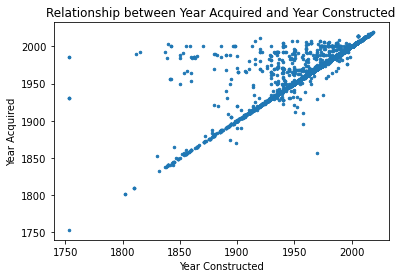

In [25]:
# Relationship between the year acquired and the year constructed

# replace NA in the dataset to 0
# scatter the plot with Year Constructed as x and Year Acquired as y
x = building['Year Constructed'].replace(0, np.nan)
y = building['Year Acquired'].replace(0, np.nan)
plt.plot(x, y,'o', marker=".", markersize=5)

# add title and x and y label
plt.title('Relationship between Year Acquired and Year Constructed')
plt.xlabel('Year Constructed')
plt.ylabel('Year Acquired')
plt.show()

In [26]:
# Here is the visualization of the relationship between the year acquired and the year constructed. 
# We can see there is a clear linear line of y = x in the plot, indicating there are many buildings constructed and acquired in the same year. 
# We can also see there were many buildings constructed between 1925 and 2000, and many buildings acquired between 1950 and 2000. 

In [27]:
# The successes of this visualization is we can find a clear linear pattern between year acquired and year constructed.
# The shortcoming of this visualization is it is hard to find a mathematical function of it and scatter it in this plot.  

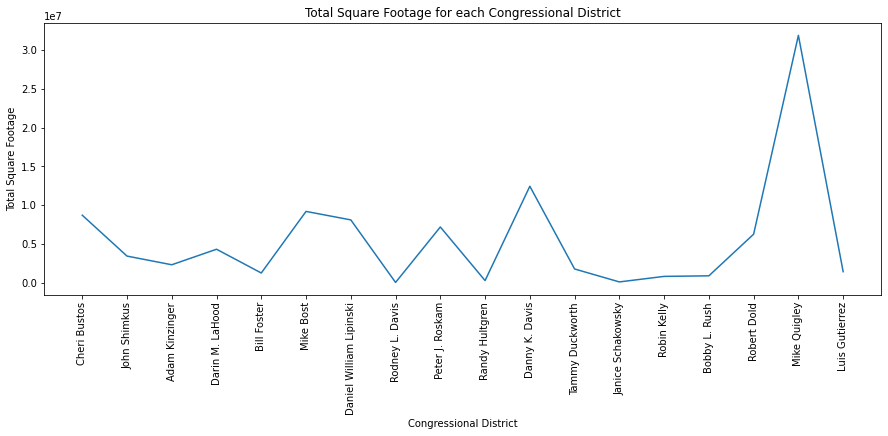

In [28]:
# Total square footage as a function of congressional district ("Congress Dist")

# create a subset dataframe with congressional district and square footage
sub_building = building[['Congress Dist','Square Footage']]

# create a list of congressional full name
dist_names = tuple([x for x in list(building['Congressional Full Name'].unique()) if isinstance(x,str)])

# return evenly spaced square footage for each congressional district within a given interval
sq_foot = np.arange(len(dist_names))

# group the total square footage by congressional district - full name
fun_dist = building.groupby('Congressional Full Name')['Square Footage'].sum()

# make plot with total square footage as a function of congressional district - full name
ax = plt.figure(figsize=(15,5))
plt.plot(sq_foot, fun_dist)
plt.xticks(sq_foot, dist_names, rotation=90)
plt.ylabel('Total Square Footage')
plt.xlabel('Congressional District')
plt.title('Total Square Footage for each Congressional District')

plt.show()

In [29]:
# Reference linke: https://alpha.iodide.io/notebooks/4401/?revision=64635
# This visualization is about the total square footage as a function of congressional district. 
# We can see there is a huge noise in the relation of total square footage as a function of congressional district.
# The value of total square footage is extremely large for Mike Quigley. 

In [30]:
# The successes of this plot is that I choose to use the full name for congressional district.
# This can give people a clearer and more direct sense of the relationship between congressional district and square footage, compared with the numbers of congressional district.
# I also changed the figure size and used rotation in the plot to make it a better visualization. 
# The shortcoming in this visualization is the pattern of the relationship is not clear enough. 

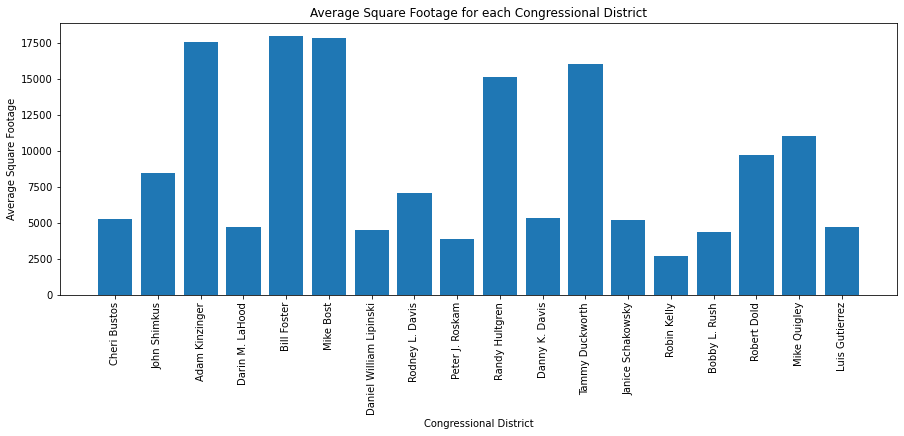

In [31]:
# Average square footage as a function of congressional district ("Congress Dist")

# create a subset dataframe with congressional district, total floors and square footage
sub_building = building[['Congress Dist','Total Floors','Square Footage']]

# create a list of congressional full name
dist_names = tuple([x for x in list(building['Congressional Full Name'].unique()) if isinstance(x,str)])

# return evenly spaced square footage for each congressional district within a given interval
sq_foot = np.arange(len(dist_names))

# group the average square footage by congressional district - full name
fun_dist_sq = building.groupby('Congressional Full Name')['Square Footage'].sum()
fun_dist_tf = building.groupby('Congressional Full Name')['Total Floors'].sum()
fun_dis_avg = fun_dist_sq / fun_dist_tf

# make plot with average square footage as a function of congressional district - full name
ax = plt.figure(figsize=(15,5))
plt.bar(sq_foot, fun_dis_avg)
plt.xticks(sq_foot, dist_names, rotation=90)
plt.ylabel('Average Square Footage')
plt.xlabel('Congressional District')
plt.title('Average Square Footage for each Congressional District')

plt.show()

In [32]:
# Reference linke: https://alpha.iodide.io/notebooks/4401/?revision=64635
# This visualization is about the average square footage as a function of congressional district. 
# We can see there is a huge noise in the relation of average square footage as a function of congressional district.
# Some values are extremely large while some are really small. 

In [ ]:
# The successes of this plot is that I choose to use the full name for congressional district.
# This can give people a clearer and more direct sense of the relationship between congressional district and square footage, compared with the numbers of congressional district.
# I also changed the figure size and used rotation in the plot to make it a better visualization. 
# The shortcoming in this visualization is the pattern of the relationship is not clear enough. 